In [1]:
%run -i settings.py

In [2]:
dop1, x1 = ecvproc.ep_read('./data/Si-B_5-37@0.840.EP')

for i,d in enumerate(dop1):
    if d <5e17:
        x1[i] *= 0.8
x1[15] *= 0.95
x1[16] *= 0.9
x1[17] *= 1.1

In [3]:
trim1 = np.genfromtxt('./data/Si-B_20keV.txt', skip_header=38, 
                     names=['depth', 'B', 'Al', 'Si', 'O'])

# trim1 =np.genfromtxt('./data/Si_20keV_corrected.dat',
#                     names=['depth', 'B'])
dose = 2e14
d_tr1 = trim1['B']*dose
x_tr1 = trim1['depth'] # in Å
# d_tr1 = trim1['B']
d_tr1[-1] = 1e15
d_tr1[-2] = 1e15

In [4]:
data =np.genfromtxt('./data/Si-B_5_result.out.vg_0.00-cb.res').T
x = data[0]*1e7 #nm
Ec = data[1]
Ev = data[2]
Ef = data[3]
p = data[6]

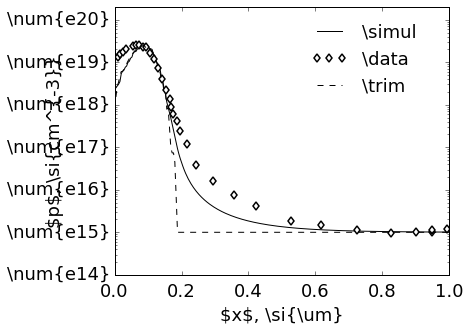

In [6]:
fig =plt.figure()
px = fig.add_subplot(111)
px.plot(x/1000, p, 'k-',label=r'\simul')
px.plot(x1, dop1, 'd', label=r'\data', mfc='w', mew=1.5, mec='k')
px.plot(x_tr1*0.1/1000, d_tr1, 'k--', label=r'\trim')
px.set_xlim(0, 1)
px.set_yscale('log')
px.set_ylim(1e14, 2e20)

px.yaxis.set_major_formatter(exponent) # exponent in setup.py
px.yaxis.set_label_coords(-0.15,0.5)
px.tick_params(axis='x', pad=8)
plt.legend(loc='best', frameon=False, numpoints=3,
           bbox_to_anchor=(0.95, 1))

px.set_ylabel(r'\$p$, \si{cm^{-3}}')
px.set_xlabel(r'\$x$, \si{\um}')
plt.savefig("Si-B_5_nx_trim_bw.svg")

In [5]:
delta_x = x_tr1[1:]-x_tr1[:-1]
print(len(delta_x))
for x,d in zip(delta_x,d_tr1):
#     line = '  {:.3e}   '.format(x)+'{:.3e}   0.00'.format(-d)
    line = '  {:.3e}   '.format(x)+'{:.3e}'.format(-d)    
    print(line)

36
  2.985e+01   -1.543e+18
  5.970e+01   -2.799e+18
  5.970e+01   -2.955e+18
  5.970e+01   -5.977e+18
  5.970e+01   -6.310e+18
  8.955e+01   -7.836e+18
  8.955e+01   -1.027e+19
  5.970e+01   -1.276e+19
  1.194e+02   -1.766e+19
  8.955e+01   -2.078e+19
  8.955e+01   -2.445e+19
  8.955e+01   -2.725e+19
  1.194e+02   -2.445e+19
  8.955e+01   -2.078e+19
  2.985e+01   -1.673e+19
  2.985e+01   -1.501e+19
  2.985e+01   -1.501e+19
  5.970e+01   -1.027e+19
  2.985e+01   -9.733e+18
  5.970e+01   -7.423e+18
  2.985e+01   -5.662e+18
  5.971e+01   -3.875e+18
  0.000e+00   -3.293e+18
  5.970e+01   -2.135e+18
  2.985e+01   -2.022e+18
  5.970e+01   -8.973e+17
  0.000e+00   -8.973e+17
  8.955e+01   -5.817e+17
  0.000e+00   -5.817e+17
  8.955e+01   -3.205e+17
  0.000e+00   -3.205e+17
  8.956e+01   -1.276e+17
  0.000e+00   -1.276e+17
  1.791e+02   -2.022e+16
  2.985e+01   -2.022e+16
  9.764e+04   -1.000e+15
